<a href="https://colab.research.google.com/github/RonakPandya072/Basic-Convolution-in-Python/blob/main/Basic_Convolution_Operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import os
from pylab import *

**Load and display the image**

In [2]:
image = Image.open('image01.png')

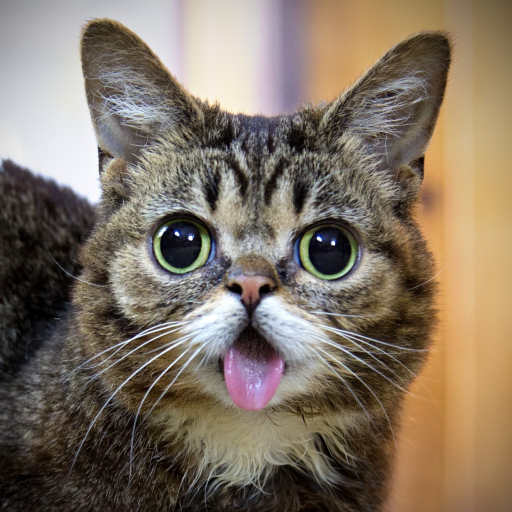

In [3]:
image

**Convert the image to a gray-scale image and display the image**

In [7]:
gray = image.convert('L')

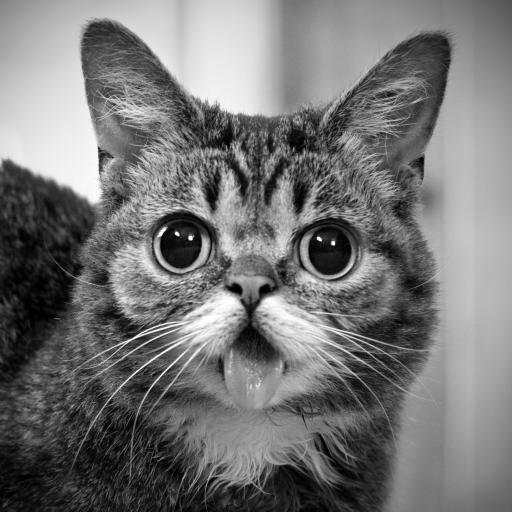

In [8]:
gray

In [9]:
gray_array = np.array(gray)
print(f"shape of the given image is: {gray_array.shape}")
# we converted RGB image into Gray scale image

shape of the given image is: (512, 512)


**Apply Gaussian smoothing to the gray-scaled image. Display the image after Gaussian smoothing.**

For applying Gaussian Smoothing we have to define the the Gaussian kernel function. Although, we can use the inbuilt functions given in most of the libraries.

In [10]:
#defining Gaussian kernel

def Gaussian_kernel(kernel_size):
  sigma = math.sqrt(kernel_size)
  #defining 1D kernel size
  kernel_1D = np.linspace(-kernel_size/2, kernel_size/2, kernel_size)
  #standardizing the input of kernel_1D with mue 0 and sigma = math.sqrt(kernel_size) using a dnorm function
  kernel_1D = dnorm(kernel_1D,0,sigma)

  #converting 1D to 2D using np.outer product
  kernel_2D = np.outer(kernel_1D.T,kernel_1D.T)

  #ploting the kernel
  plt.imshow(kernel_2D, cmap='gray')
  plt.axis('off')
  plt.title('Gaussian Kernel')

  return kernel_2D

def dnorm(x,mue, sigma):
  return 1/np.sqrt(2*np.pi*(sigma**2))*np.e**(-np.power((x - mue)/sigma,2)/2)

In [11]:
#Now our Gaussian kernel is ready, Let's define convolution operation

def convolution(image, kernel):
  output_imagesize = output_image_size(image.shape[0], kernel.shape[0])
  k_size = kernel.shape[0]
  #generating array filled with zeros having size as output image
  output_image = np.zeros(shape=(output_imagesize, output_imagesize))
  #performing convolution over the image using np.multiply and np.sum
  for i in range(output_imagesize):
    for j in range(output_imagesize):
      Matrix = image[i:i+k_size, j:j+k_size]
      output_image[i,j] = np.sum(np.multiply(Matrix,kernel))
      #assiging 0 value when output_image pixel value goes to subzero value
      if output_image[i,j] < 0:
        output_image[i,j] = 0
  
  return output_image

#calculating the output image size after convolution
def output_image_size(image_shape, kernel_shape):
  no_of_pixel = 0

  for i in range(image_shape):
    a = i + kernel_shape
    if a <= image_shape:
      no_of_pixel+=1
  return no_of_pixel

In [12]:
#Defining plotting style

def plotting(image1, image2,filter_name):
  plt.figure(figsize=(12,12))
  plt.subplot(1,2,1)
  plt.imshow(image1, cmap='gray')
  plt.title('Before applying filter')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(image2, cmap='gray')
  plt.axis('off')
  plt.title(f'After applying {filter_name} filter')

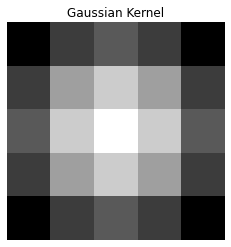

In [13]:
kernel_1 = Gaussian_kernel(5)

In [14]:
Gaussian_image = convolution(gray_array,kernel_1)

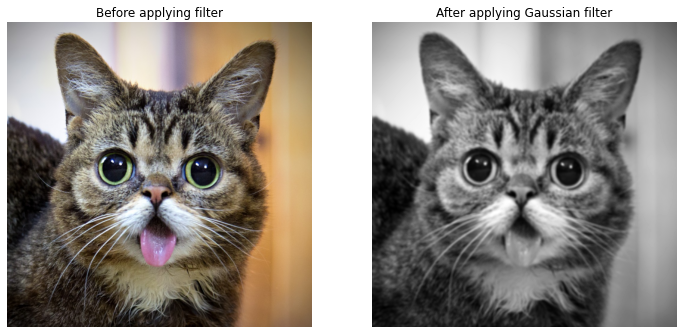

In [15]:
plotting(image,Gaussian_image,'Gaussian')

image is smoothend a bit after applying the gaussian filter

**3*3 Horizontal sobel filter(as shown below) and apply it to the smoothened image.**

In [16]:
sobel_h = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

In [17]:
sobel_horizontal = convolution(gray_array,sobel_h)

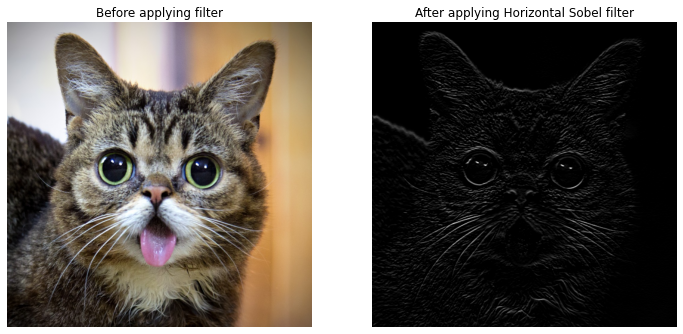

In [18]:
plotting(image,sobel_horizontal,'Horizontal Sobel')

above image is showing horizontal edges

**3*3 Vertical sobel filter(as shown below) and apply it to the smoothened image.**

In [19]:
sobel_v = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]])

In [20]:
sobel_vertical = convolution(gray_array,sobel_v)

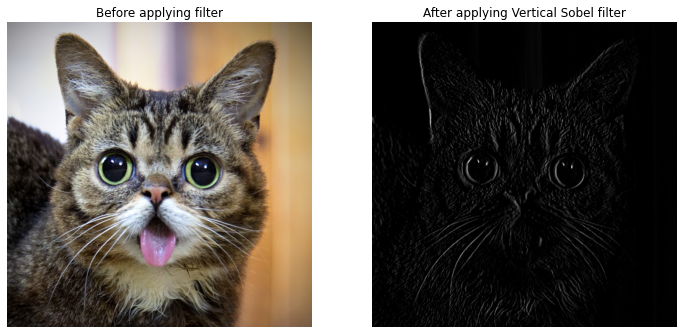

In [21]:
plotting(image,sobel_vertical,'Vertical Sobel')

Above image is showing vertical edges


-----End of the Tutorial 01-----